In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

In [ ]:
act = pd.read_csv('act_sample.csv')
people = pd.read_csv('people_sample.csv')

In [ ]:
# no dummiazation variables:
print(len(act.char_10.unique()))
print(len(people.group_1.unique()))

In [69]:
#act set
# Numerize the category features
categories = {}
for c in act.columns[3:-1]:
    categories[c] = [np.nan]
    categories[c] = list(set(categories[c] + list(act[c].unique())))
    
for col in list(categories.keys()):
    for i,cat in enumerate(categories[col]):
        act = act.replace({col:cat},{col:i})
        #act[col+'_mv'] = pd.Series(act[col] == 0, dtype=int)

[8, 44, 30, 11, 8, 7, 6, 9, 19, 20]


//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


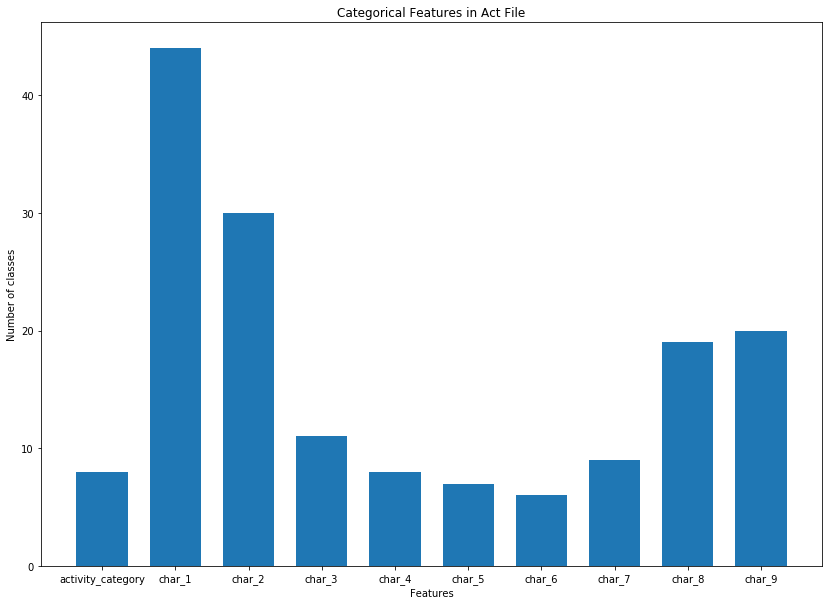

In [75]:
x = np.arange(5,5+2*len(categories),2)
y = []
for v in categories.values():
    y.append(len(v))
print(y)
plt.bar(x,y,width = 1.4,tick_label = categories.keys())
plt.xlabel('Features')
plt.ylabel('Number of classes')
plt.title('Categorical Features in Act File')
plt.legend()

In [22]:
# transform date
act['date'] = pd.to_datetime(act['date'])

In [23]:
act['year'] = act.date.dt.year
act['month'] = act.date.dt.month
act['day'] = act.date.dt.day
act = act.drop('date',1)

In [76]:
#People set
# Bool to int:
binary_cols = [c for c in people.columns if people[c].dtype == np.bool]
people.loc[:,binary_cols] = people.loc[:,binary_cols].astype(int)

In [25]:
#check if there is any missing values
print(people.isnull().values.any()) # False

False

In [77]:
#Numberize categorical fields:
categories = {}
categorical_cols = [c for c in people.columns if people[c].dtype == np.object and c != 'people_id' and c != 'date' ]

for c in categorical_cols:
    categories[c] = [np.nan]
    categories[c] = list(set(categories[c] + list(people[c].unique())))

for col in list(categories.keys()):
    for i,cat in enumerate(categories[col]):
        people = people.replace({col:cat},{col:i})

In [92]:
lens = [len(categories), len(binary_cols),len(people.columns)]
print(lens) #(9, 28, 41)

(9, 28, 41)

[3, 4, 43, 26, 10, 8, 26, 9, 10]


//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


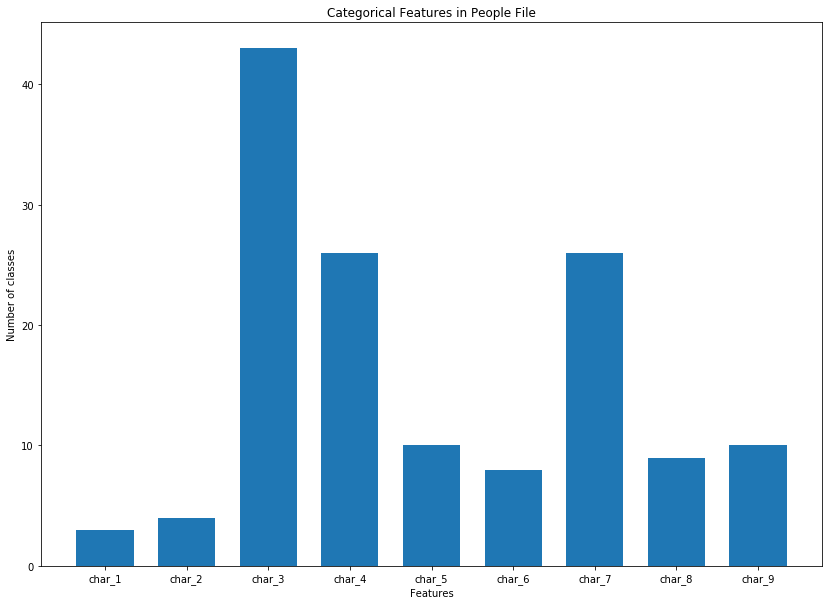

In [82]:
x = np.arange(5,5+2*len(categories),2)
y = []
for v in categories.values():
    y.append(len(v))
print(y)
plt.bar(x,y,width = 1.4,tick_label = categories.keys())
plt.xlabel('Features')
plt.ylabel('Number of classes')
plt.title('Categorical Features in People File')
plt.legend()

In [27]:
people['date'] = pd.to_datetime(people['date'],infer_datetime_format=True)

In [28]:
people = people.drop_duplicates()

In [29]:
people['year'] = people.date.dt.year
people['month'] = people.date.dt.month
people['day'] = people.date.dt.day
people = people.drop('date',1)

In [30]:
#Write into new CSV
people.to_csv('processed_people.csv',index=False)
act.to_csv('processed_act.csv',index=False)

In [31]:
# Rename columns for merge
people.columns = ['people_'+ str(c) for c in people.columns]
act.columns = ['act_' + str(c) for c in act.columns]

In [32]:
#Merge two datasets
data_cb = pd.merge(act,people,left_on='act_people_id', right_on='people_people_id')

In [33]:
#Drop useless columns
data_cb = data_cb.drop(['act_people_id','act_activity_id','people_people_id'],1)

In [34]:
data_cb.to_csv('merge_sample.csv',index=False)